# Part 1: Use histogram-based approach to assign the class label for the given images

In [1]:
from PIL import Image
import numpy as np
import cv2
from skimage import data
from skimage.filters import threshold_multiotsu
from matplotlib import pyplot as plt

In [2]:
path1 = "/Users/rashmipathak/Desktop/ED6001 Assignments/Assignment3/49/testA_37.bmp"

In [3]:
path2 = "/Users/rashmipathak/Desktop/ED6001 Assignments/Assignment3/49/testA_41.bmp"

In [4]:
path3 = "/Users/rashmipathak/Desktop/ED6001 Assignments/Assignment3/49/testA_42.bmp"

In [5]:
path4 = "/Users/rashmipathak/Desktop/ED6001 Assignments/Assignment3/49/testA_45.bmp"

In [6]:
path5 = "/Users/rashmipathak/Desktop/ED6001 Assignments/Assignment3/49/testB_20.bmp"

In [7]:
im = cv2.imread(path1,0)

In [8]:
pix = np.array(im)
print(pix.shape)

(522, 775)


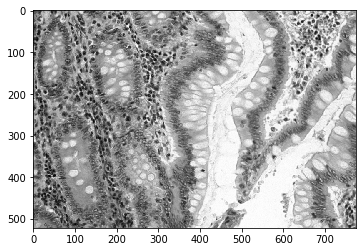

In [9]:
plt.imshow(pix,cmap = 'gray')

In [10]:
hist = cv2.calcHist([pix],[0],None,[256],[0,255])

(0, 256)

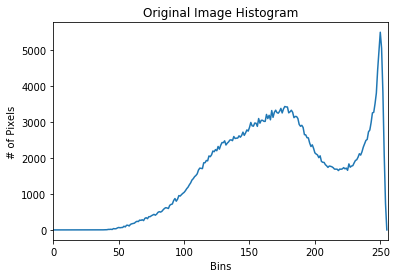

In [11]:
# plot the histogram
plt.figure()
plt.title("Original Image Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

In [12]:
thresholds = threshold_multiotsu(pix,classes=3,nbins=256)

In [13]:
print(thresholds)

[145 203]


In [14]:
#Using the threshold values, we generate the three regions.
regions = np.digitize(pix, bins=thresholds)

In [15]:
def calchist(img):
    count  = np.zeros((256,1))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            count[int(img[i,j])] = count[int(img[i,j])] + 1
    return count

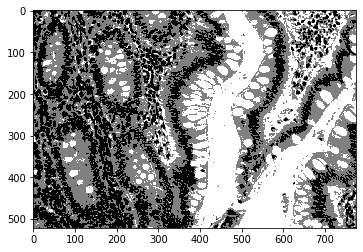

In [16]:
plt.imshow(regions,cmap = 'gray')

In [17]:
hist1 = calchist(regions)


(0, 256)

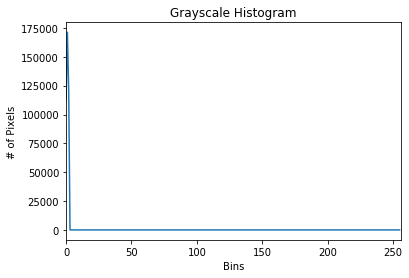

In [18]:
# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist1)
plt.xlim([0, 256])

In [19]:
def mean(arr,start,end,N):
        tot = 0
        for i in range(start,end):
            tot = tot + (i*arr[i])  # start and end are start index and end index between which mean needs to be find
        return tot/N

In [20]:
def count(arr,start,end):
    val = 0
    for i in range(start,end):
        val = val + arr[i]
    return val

In [21]:
# ***************Otsu's Thresholding******************
def Otsu(img):
    #Step 1 - Find total Mean
    #histr = cv2.calcHist([img],[0],None,[256],[0,256]) # Array with Frequency count of intensity
    histr = calchist(img)
    #print(histr[0])
    N = img.size
    total = 0
    for i in range(0,255):
        total = total + (i * histr[i])
    print(total)
    Mean_T = total/N

    #Step 2 - Assume each intensity as the threshold and For each intensisy calculate between class variance
    # Mu1 is class-1 mean and Mu2 is class2 mean
    max_v = 0
    max_sigma  = 0
    for t in range(1,254):
        N1 = count(histr,0,t)
        N2 = count(histr,t+1,255)
        Mu1 = mean(histr,0,t,N1)
        Mu2 = mean(histr,t+1,255,N2)
        temp_sigma = (((Mu1 - Mean_T)*(Mu1 - Mean_T))*(N1/N)) + (((Mu2 - Mean_T)*(Mu2 - Mean_T))*(N2/N))
        if(temp_sigma>max_sigma):
            max_v = t
            max_sigma = temp_sigma
    #************Now Thresholding the image using given threshold t i.e. max_v *****************  
    print(max_v)
    len1 = img.shape[0]
    width = img.shape[1]
    for i in range(0,len1):
        for j in range(0,width):
            if(img[i,j]<max_v):
                img[i,j] = 0 #backgorund image
            else:
                img[i,j] = 1 #foreground image
    print('Otsu Thresholding result:')
    plt.imshow(img, cmap = 'gray')
    plt.show()
    return img

[70816444.]
177


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


Otsu Thresholding result:


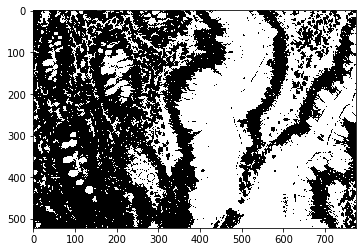

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [22]:
Otsu(pix)

In [27]:
im = cv2.imread(path1,0)
pix = np.array(im)
#Calculate the Histogram of image
hist = cv2.calcHist([pix],[0],None,[256],[0,255])
#print(hist)

In [28]:
#First Histogram smoothness using the intensity based procedure
peak = []
pit = []
for i in range(1,254):
    if((hist[i-1]<hist[i]) and (hist[i]>hist[i+1])):
        peak.append(i)
    if((hist[i-1]>hist[i]) and (hist[i]<hist[i+1])):
        pit.append(i)

In [29]:
print(len(peak),len(peak))

48 48


In [30]:
print(pit)

[45, 47, 51, 55, 58, 65, 67, 69, 72, 78, 82, 88, 94, 97, 114, 118, 120, 123, 125, 127, 130, 132, 137, 139, 143, 146, 149, 153, 156, 158, 162, 164, 166, 168, 172, 175, 180, 184, 189, 197, 203, 210, 218, 220, 223, 225, 227, 235]


In [31]:
peakpitvector = []
for i in range(len(pit)):
    peakpitvector.append(peak[i])
    peakpitvector.append(pit[i])

In [32]:
print(peakpitvector)

[44, 45, 46, 47, 50, 51, 54, 55, 57, 58, 64, 65, 66, 67, 68, 69, 71, 72, 77, 78, 81, 82, 86, 88, 93, 94, 96, 97, 112, 114, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 136, 137, 138, 139, 142, 143, 145, 146, 148, 149, 151, 153, 154, 156, 157, 158, 163, 162, 165, 164, 167, 166, 170, 168, 174, 172, 177, 175, 182, 180, 185, 184, 190, 189, 198, 197, 204, 203, 211, 210, 219, 218, 222, 220, 224, 223, 226, 225, 234, 227, 250, 235]


In [33]:
LD = []
for i in range(len(pit)):
    LD.append(np.abs(peak[i] - pit[i]))

In [34]:
LD_mean = np.mean(LD)

In [35]:
print(LD_mean)

1.6041666666666667


In [48]:
beta_intesity = 40 #Assume here, it should be derived from GA 
Th_intesity = LD_mean * beta_intesity

In [49]:
print(Th_intesity)

64.16666666666667


In [50]:
SLD = []
for i in range(len(peakpitvector)):
    if(peakpitvector[i]>Th_intesity):
        SLD.append(peakpitvector[i])

In [51]:
print(SLD)

[65, 66, 67, 68, 69, 71, 72, 77, 78, 81, 82, 86, 88, 93, 94, 96, 97, 112, 114, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 136, 137, 138, 139, 142, 143, 145, 146, 148, 149, 151, 153, 154, 156, 157, 158, 163, 162, 165, 164, 167, 166, 170, 168, 174, 172, 177, 175, 182, 180, 185, 184, 190, 189, 198, 197, 204, 203, 211, 210, 219, 218, 222, 220, 224, 223, 226, 225, 234, 227, 250, 235]


In [52]:
HD = np.zeros((len(SLD),1))
for i in range(1,len(SLD),2):
    val =  hist[SLD[i]] - hist[SLD[i-1]]
    HD[i] =  val

In [53]:
HD_mean = np.mean(HD)

In [54]:
print(HD_mean)

97.76470588235294


In [56]:
beta_frequency = 34
Th_freq = HD_mean * beta_frequency

In [57]:
print(Th_freq)

3324.0


In [58]:
SHD = []
for i in range(len(SLD)):
    if(hist[SLD[i]]>Th_freq):
        SHD.append(hist[SLD[i]])

In [59]:
print(len(SHD))

5


In [60]:
CC = []
for i in range(len(SHD)):
    for j in range(0,255):
        if (hist[j] == SHD[i]):
            CC.append(j)

In [61]:
print(CC) # These are centroid intensity values which will be used in K-mean clustering

[170, 174, 177, 182, 250]


In [69]:
im = cv2.imread(path1,0)
pix = np.array(im)

Thresholding result:


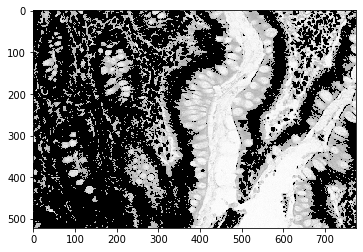

In [70]:
for i in range(0,pix.shape[0]):
        for j in range(0,pix.shape[1]):
            if(pix[i,j]<CC[0]):
                pix[i,j] = 0 #backgorund image
            elif(pix[i,j]<CC[1] and pix[i,j]>CC[0]):
                pix[i,j] = 1 #foreground image
            
print('Thresholding result:')
plt.imshow(pix, cmap = 'gray')
plt.show()   

In [71]:
hist = cv2.calcHist([pix],[0],None,[256],[0,255])

(0, 256)

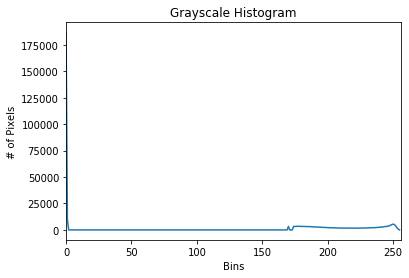

In [72]:
# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

In [73]:
####**********Sklearn kmeans inbuilt method******************####
from sklearn.cluster import KMeans

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  This is separate from the ipykernel package so we can avoid doing imports until


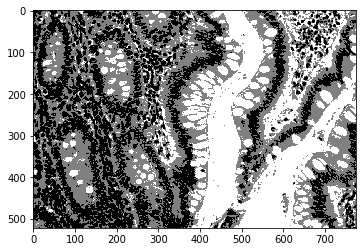

In [75]:
im = cv2.imread(path1,0)
pix = np.array(im)
kmeans = KMeans(n_clusters=3, init=np.array([[120], [170],[245]])).fit(pix.reshape(-1, 1))
init_l = kmeans.predict(pix.reshape(-1, 1))
init_l = init_l.reshape(pix.shape)
plt.imshow(init_l,cmap='gray')

In [76]:
####*************My implemented kmeans algorithm*******************########

In [79]:
im = cv2.imread(path1,0)
pix = np.array(im)

In [80]:
#K Means clustering algorithm

In [81]:
#euclidean distance between a and b
def euclideanDist(a,b):
    return (a-b)**2

In [82]:
def min(a,b,c):
    m = 0
    if(a<b):
        m = a
    else:
        m = b
    if (c<m):
        m = c
    return m

In [83]:
Clust = []
cluster_count = len(CC)
for i in range(cluster_count):
    Clust.append([])   
height = pix.shape[0]
width = pix.shape[1]
l = 0
for epoch in range(5):
    for i in range(0,height):
        for j in range(0,width):
            #distance of the pixel from each cluster
            d = np.zeros(cluster_count)
            for l in range(cluster_count):
                d[l] = euclideanDist(pix[i][j],CC[l]) #take the distance from all clusters
               # d2 = euclideanDist(pix[i][j],CC[1])
                # d3 = euclideanDist(img[i][j],CC[2])
            m = np.min(d)
            for l in range(0,len(CC)):
                if(d[l] == m):
                    Clust[l].append((i,j))         
    # Again finding the mean of each clusters
    for k in range(cluster_count):
        len1 = len(Clust[k])
        #len2 = len(clust2)
        sum = 0
        for x in range(len1):
            ind = Clust[k][x]
            sum = sum + pix[ind]
        if (len1 != 0):
            CC[k] = sum/len1
    #Replace initial image with c_init intensities as the k means algo is converged
    if(epoch == 4): 
        for k in range(cluster_count):
            for x in range(len(Clust[k])):
                ind = Clust[k][x]
                pix[ind] = CC[k]
    for k in range(cluster_count):
        Clust[k].clear()

[110.35921715718986, 152.28576151755917, 180.58552349213562, 207.35910263022177, 241.40362564551108]


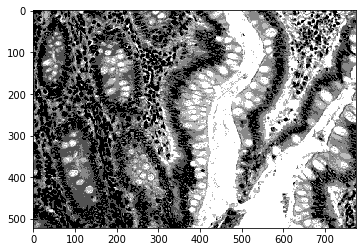

In [84]:
plt.imshow(pix,cmap = 'gray')
print(CC)

In [1445]:
hist = cv2.calcHist([pix],[0],None,[256],[0,255])

(0, 256)

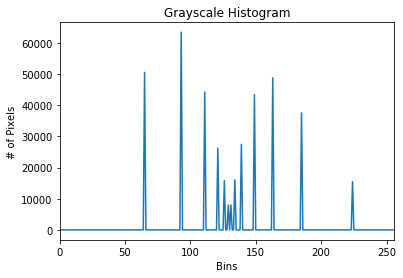

In [1446]:
# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

# Part 2: Apply graph cut method to optimize the delineation of the gland from the background using minimization algorithms: alpha-expansion and alpha-beta swap

In [1119]:
print(np.unique(pix))

[110 152 180 207 241]


In [85]:
import maxflow as mf
import numpy as np
import time
import sys 
import os.path
from random import shuffle
import scipy

In [86]:
def image_to_array(img):
    '''input: path to image
       output: array of grayscale
       reference: https://stackoverflow.com/questions/40727793/how-to-convert-a-grayscale-image-into-a-list-of-pixel-values
       '''
    from PIL import Image
    img = img.convert('L')
    w, h = img.size
    data = list(img.getdata())
    data = [data[off:off+w] for off in range(0, w*h, w)]

    return data

In [87]:
def calculate_energy(img_orig, img_work):
    '''Calculates Energy of image.
       img: is input array'''

    E_data = 0
    for i in range(len(img_orig)):
        for j in range(len(img_orig[0])):
            E_data += D_p(img_orig[i][j], img_work, j, i)
    
    E_smooth = 0
    for i in range(len(img_orig)):
        for j in range(len(img_orig[0])):
            ns = give_neighbours(img_work, j, i)
            for v in ns:
                E_smooth += sum([V_p_q(v, img_work[i][j])])

    return E_data + E_smooth


In [88]:
def V_p_q(label1, label2):
    return abs(label1-label2)


In [89]:
def D_p(label, graph, x, y):
    #Returns the quadratic difference between label and real intensity of pixel"
    return (abs(label-graph[y][x]))  #best working D_p
    

In [90]:
def give_neighbours(image, i, j):
    neigh_list = []
    for a,b in zip([1,0,-1,0],[0,1,0,-1]):
        if (x+a<len(image[0]) and x+a>=0) and (y+b<len(image) and y+b>=0):
            neigh_list.append(image[j+b][i+a])
    return neigh_list 



In [91]:
####Mapping of alpha and beta intensity which is used in alpha beta swap
def mapping_image_ab(image, alpha, beta):
    #map does the position in graph map to (y,x) position in image
    map = {}
    #other way 
    revmap = {}
    #loop over all pixels and add them to maps
    map_parameter = 0
    for y in range(len(image)):
        for x in range(len(image[0])):
            #extract pixel which have the wanted label
            if image[y][x] == alpha or image[y][x] == beta:
                map[map_parameter] = (y,x)
                revmap[(y,x)] = map_parameter
                map_parameter += 1
    
    return map, revmap

In [92]:
#******Mapping of alpha and alpha_bar defined which is used in alpha expansion method
def mapping_image_a(image,alpha,alpha_bar):
    map = {}
    #other way 
    revmap = {}
    #loop over all pixels and add them to maps
    map_parameter = 0
    for y in range(len(image)):
        for x in range(len(image[0])):
            #extract pixel which have the wanted label
            
            map[map_parameter] = (y,x)
            revmap[(y,x)] = map_parameter
            map_parameter += 1
    
    return map, revmap

In [93]:
#Definition of alpha beta swap
def alpha_beta_swap(alpha, beta, img_orig, img_work):
    #extract position of alpha or beta pixels to mapping 
    map, revmap = mapping_image_ab(img_work, alpha, beta)

    #graph of maxflow 
    graph_mf = mf.Graph[float](len(map) )
    #add nodes
    nodes = graph_mf.add_nodes(len(map))
            
    #add n-link edges
    weight = V_p_q(alpha, beta)
    for i in range(0,len(map)):
        y,x = map[i]
        #top, left, bottom, right
        for a,b in zip([1,0,-1,0],[0,1,0,-1]):
            if (y+b, x+a) in revmap:
                graph_mf.add_edge(i,revmap[(y+b,x+a)], weight, 0)
   
    #add all the terminal edges
    for i in range(0,len(map)):
        y,x = map[i]
        #find neighbours
        neighbours = give_neighbours(img_work, x, y)
        #consider only neighbours which are not having alpha or beta label
        fil_neigh = list(filter(lambda i: i!=alpha and i!=beta, neighbours))
        #calculation of weight
        t_weight_alpha = 0
        t_weight_beta = 0
        for v in fil_neigh:
            t_weight_alpha = t_weight_alpha + V_p_q(alpha,v)
            t_weight_beta  = t_weight_beta + V_p_q(beta,v)
        t_weight_alpha = t_weight_alpha + D_p(alpha, img_orig, x, y)
        t_weight_beta  = t_weight_beta +  D_p(beta, img_orig, x, y)
        graph_mf.add_tedge(nodes[i], t_weight_alpha, t_weight_beta)

    #calculating flow
    flow = graph_mf.maxflow()
    res = [graph_mf.get_segment(nodes[i]) for i in range(0, len(nodes))]
    #print(res)
    #depending on cut assign new label
    for i in range(0, len(res)):
        y, x = map[i] 
        if res[i] == 1:
            #print('hello')
            img_work[y][x] = alpha 
        elif res[i] == 0:
            img_work[y][x] = beta
    
    return img_work


In [94]:
#*****Definition of alpha expansion
def alpha_expansion(alpha, img_orig, img_work):
    #extract position of alpha or alpha_bar pixels to mapping 
    alpha_bar = 255 - alpha
    map, revmap = mapping_image(img_work, alpha,alpha_bar) #Unable to consider auxiliary node here
    print(len(map))
    #graph of maxflow 
    graph_mf = mf.Graph[float](len(map) )
    #add nodes
    nodes = graph_mf.add_nodes(len(map))
            
    #add n-link edges
    for i in range(0,len(map)):
        y,x = map[i]
        weight = V_p_q(img_orig[y][x],alpha)
        #top, left, bottom, right
        for a,b in zip([1,0,-1,0],[0,1,0,-1]):
            if ((y+b, x+a) in revmap):
                graph_mf.add_edge(i,revmap[(y+b,x+a)], weight, 0)
    #add all the terminal edges
    for i in range(0,len(map)):
        y,x = map[i]
        #find neighbours
        neighbours = give_neighbours(img_work, x, y)
        #consider only neighbours which are not having alpha 
        fil_neigh = list(filter(lambda i: i!=alpha, neighbours))
        #calculation of weight
        t_weight_alpha = 0
        t_weight_alpha_bar = 0
        for v in fil_neigh:
            t_weight_alpha = D_p(alpha, img_orig, x, y)
            t_weight_alpha_bar  = D_p(alpha_bar, img_orig, x, y)
            graph_mf.add_tedge(nodes[i], t_weight_alpha, t_weight_alpha_bar)

    #calculating flow
    flow = graph_mf.maxflow()
    res = [graph_mf.get_segment(nodes[i]) for i in range(0, len(nodes))]
    #print(res)
    #depending on cut assign new label
    for i in range(0, len(res)):
        y, x = map[i] 
        if res[i] == 1:
            img_work[y][x] = alpha
    
    return img_work


In [95]:
def swap_minimization(img_orig, img_work, cycles):
    labels = []
    labels = np.unique(pix)
    #do iteration of all pairs a few times
    #labels = [0,1,2,3,4,5,6,7,8]
    
    for u in range(0,cycles):
        # shuffle(labels)
        #iterate over all pairs of labels 
        for i in range(0, len(labels)-1):
            for j in range(i+1, len(labels)):
                #alpha beta swap and graph cutting
                img_work  = alpha_beta_swap(labels[i],labels[j], img_orig, img_work)     
        print("Cycle No:"+str(u+1) + "value of energy", calculate_energy(img_orig, img_work)) 
    return img_work

In [96]:
def main():
    #image 
    cycles = 3
    im =  Image.open(path1)
    img = im.resize((100, 100), Image.ANTIALIAS)
    img_orig = image_to_array(img)
    img_work= image_to_array(img)
    img = swap_minimization(img_orig, img_work, cycles) 
    return img,img_orig


In [97]:
img,img_orig = main()

Cycle No:1value of energy 0
Cycle No:2value of energy 0
Cycle No:3value of energy 0


In [98]:
print(np.unique(img))

[ 56  61  67  68  71  72  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255]


Text(0.5, 1.0, 'Segmented image')

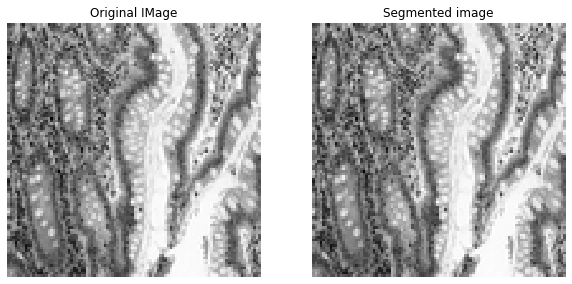

In [99]:
# create figure
fig = plt.figure(figsize=(10, 10))
# setting values to rows and column variables
rows = 1
columns = 2
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(img_orig,cmap = 'gray')
plt.axis('off')
plt.title("Original IMage")
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(img,cmap = 'gray')
plt.axis('off')
plt.title("Segmented image")

In [787]:
####*********Graph cut using built in funtions from PyMaxflow**********************#########

In [1519]:
import numpy as np
import matplotlib.pyplot as plt
from maxflow.fastmin import aexpansion_grid
from maxflow.fastmin import abswap_grid
import cv2

In [1533]:
I = cv2.imread(path5,0)

/opt/anaconda3/lib/python3.7/site-packages/maxflow/fastmin.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  binary += V[labels[slice0],labels[slice1]].sum()


[1 2]


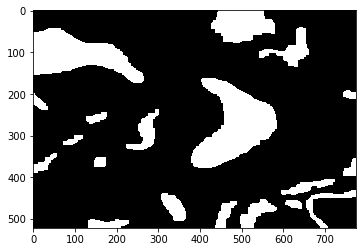

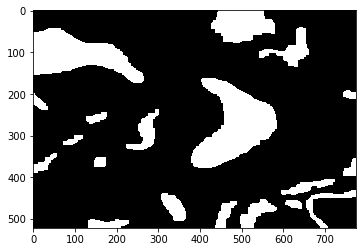

In [1534]:
# Loading image
#res = cv2.resize(I, dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
#Normalizing the image
I = I/I.max()

# Generates 3 gray levels for nearsest prototype labeling
L = 3
levs = np.arange(0.5/L, 1, 1/L)

# Calculate data cost as the absolute difference between the label prototype and the pixel value
D = np.abs(I.reshape(I.shape+(1,)) - levs.reshape((1,1,-1)))

# Generate nearest prototype labeling
Id = np.argmin(D,2)

# Calculate neighbourhood cost as absolute difference between prototypes 
alpha = 3
V = alpha * np.abs( levs.reshape((-1,1)) - levs.reshape((1,-1)))

# Mimimise data + neighbourhood cost
labels1 = abswap_grid(D,V)
labels2 = aexpansion_grid(D,V)

fg = plt.figure("Direct labeling")
ax1 = fg.add_subplot(1,1,1)
ax1.imshow(labels1,cmap = 'gray')

fg = plt.figure("Regularised labeling")
ax1 = fg.add_subplot(1,1,1)
ax1.imshow(labels2,cmap = 'gray')
print(np.unique(labels1))

In [1535]:
np.unique(labels2)

array([1, 2], dtype=int8)

# Part 3 : Compare the segmentation results with the ground truth using metrics [1] like accuracy, Dice similarity coefficient, Jaccard index (JAC), sensitivity, specificity


In [1451]:
#Manually threshold the output image
labels = np.asarray(labels)
print(labels.shape)

(522, 775)


In [1233]:
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        if(labels[i][j]>0):
            labels[i][j] = 1

In [1234]:
#(thresh, im_bw) = cv2.threshold(labels, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

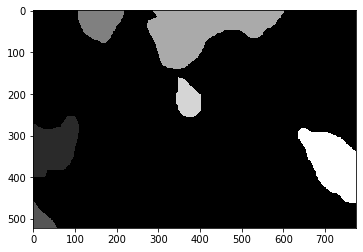

In [1453]:
#reading ground truth data:
gt1 =  cv2.imread("/Users/rashmipathak/Desktop/ED6001 Assignments/Assignment3/49/testA_41_anno.bmp",0)
#res = cv2.resize(gt1, dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
#gt = np.zeros((100,100))
plt.imshow(gt1,cmap='gray')

In [1454]:
#thresholding ground truth 
for i in range(gt1.shape[0]):
    for j in range(gt1.shape[1]):
        if(gt1[i][j]>0):
            gt1[i][j] = 1

In [1455]:
def Evaluate_score(A, B):
    # A is the ground truth, B is the segmented result.
    # Note: Sensitivity = Recall
    # TP - true positive, FP - false positive, 
    # TN - true negative, FN - false negative
    TP,TN,FP,FN = 0,0,0,0
    #Need to convert into binary image for calculation
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if(A[i][j]!=0) and (A[i][j] == B[i][j]):
                TP = TP+1
            if(A[i][j]==0) and (A[i][j] == B[i][j]):
                TN = TN+1
            if(A[i][j]==0) and (A[i][j] != B[i][j]):
                FP = FP+1
            if(B[i][j]==0) and (A[i][j] != B[i][j]):
                FN = FN+1
    Accuracy = (TP+TN)/(FN+FP+TP+TN)
    Sensitivity = TP/(TP+FN)
    Specificity = TN/TN+FP 
    Dice = 2*(TP+TN)/(TP+TN+FP+FN)
    Jaccard = Dice/(2-Dice)
    return Accuracy,Sensitivity,Specificity,Dice,Jaccard

In [1456]:
#regions = regions.resize((100, 100), Image.ANTIALIAS)
Accuracy,Sensitivity,Specificity,Dice,Jaccard = EvaluateImageSegmentationScores(img,gt1)

In [1457]:
print(Accuracy)

0.15977505870720554


In [1458]:
print(Sensitivity)

0.15977505870720554


In [1459]:
print(Specificity)

1.0


In [1460]:
print(Dice)

0.3195501174144111


In [1461]:
print(Jaccard)

0.1901574814732005
